In [4]:
# Import necessary libraries
import openai  # OpenAI API for generating text based on prompts
from IPython.display import display, Markdown  # Markdown display tools for Jupyter Notebooks
import os  # OS library for file and directory interactions
from dotenv import load_dotenv, find_dotenv  # dotenv utilities for managing environment variables
import re  # Regular expressions library for text pattern matching and formatting
import random  # Random module for generating randomized values, such as quality levels
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to convert text to Markdown format, allowing formatted display in Jupyter Notebooks
def to_markdown(text):
    # Wraps text in Markdown format for enhanced readability and presentation in Jupyter Notebooks
    return Markdown(text)

In [5]:
# Automatically locate and load the .env file with environment variables
env_path = find_dotenv()  # Searches for the .env file in the project directory
load_dotenv(dotenv_path=env_path)  # Loads the environment variables from .env

# Set the OpenAI API key from environment variable (pulled from the .env file)
openai.api_key = os.getenv('OPENAI_API_KEY')


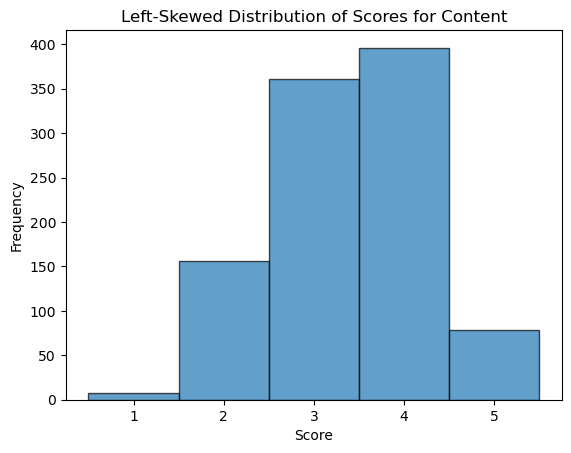

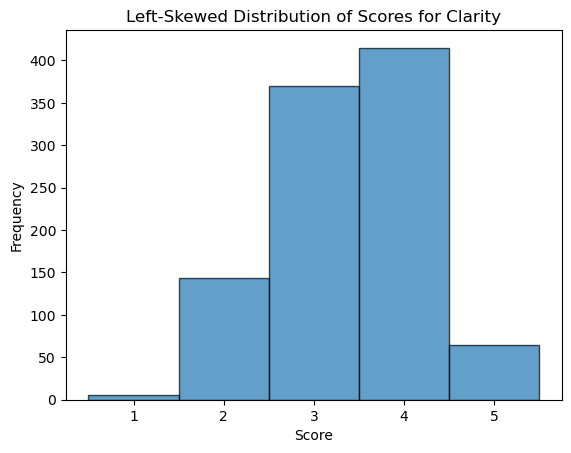

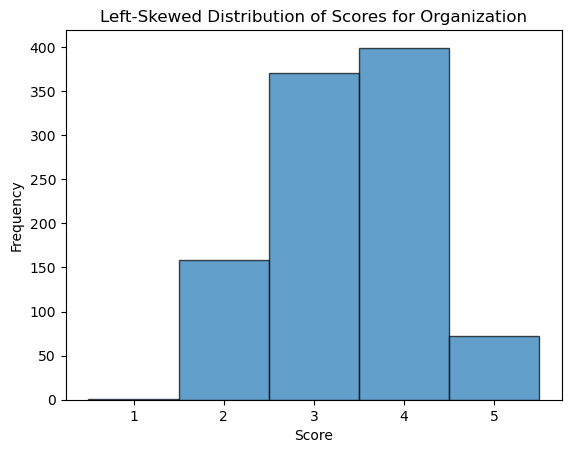

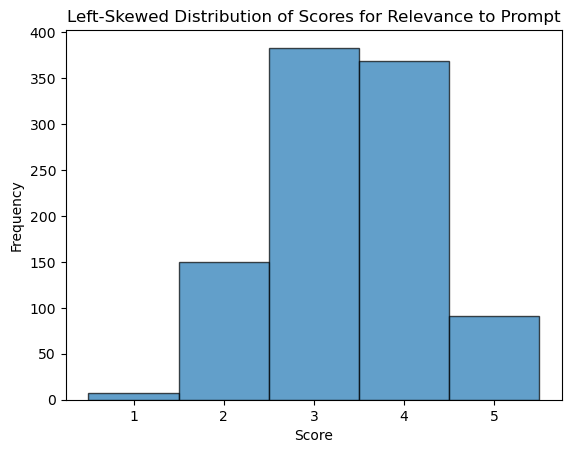

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the criteria
criteria = ["Content", "Clarity", "Organization", "Relevance to Prompt"]

# Function to generate left-skewed scores using a beta distribution
def generate_left_skewed_scores(n_samples=1000, alpha=3, beta=2):
    """
    Generates scores from a left-skewed beta distribution and scales to 1–5.
    """
    # Generate beta distribution samples between 0 and 1
    beta_samples = np.random.beta(alpha, beta, n_samples)
    # Scale to 1–5 range and round to nearest integer
    scaled_scores = np.clip(np.round(beta_samples * 4 + 1), 1, 5).astype(int)
    return scaled_scores

# Generate 1000 samples for each criterion
samples_df = pd.DataFrame()
for crit in criteria:
    samples_df[crit] = generate_left_skewed_scores()

# Plot histograms for each criterion with bins of width 1
for crit in criteria:
    plt.figure()
    plt.hist(samples_df[crit], bins=[1, 2, 3, 4, 5, 6], edgecolor='black', alpha=0.7, align='left')
    plt.title(f'Left-Skewed Distribution of Scores for {crit}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.xticks([1, 2, 3, 4, 5])  # Ensure x-axis has only integer scores
    plt.show()


### Drawing from Distribution 

In [43]:
# Sample one set of scores for each criterion using the left-skewed distribution
example_scores = {}
for crit in criteria:
    example_scores[crit] = generate_left_skewed_scores(n_samples=1)[0]  # Take a single sample

# Display the example scores
print("Example Scores for Each Criterion:")
for crit, score in example_scores.items():
    print(f"{crit}: {score}")


Example Scores for Each Criterion:
Content: 3
Clarity: 1
Organization: 2
Relevance to Prompt: 2


### NOTES

-There will be correlation within the same essay for the Criteria i.e a B student will have criteria that will have around B's -> the A person will have all A's and maybe a B+

-Describe a distribtuion and than some parameter of the distribution comes from the overall grade to create correlation for the same grades for the same assignment 

-Start with overall distribution to determine overall grade and then use a narrow distribution for the second to prevent high variability (the criteria will be centered around the main grade more or less)



In [44]:
# Generate Sample Scores for an Example Essay
target_scores = {crit: generate_left_skewed_scores(n_samples=1)[0] for crit in criteria}

# Display the generated scores
print("Generated Target Scores for Each Criterion:")
for crit, score in target_scores.items():
    print(f"{crit}: {score}")


Generated Target Scores for Each Criterion:
Content: 4
Clarity: 3
Organization: 4
Relevance to Prompt: 4


### Criteria-Score Descriptions

In [45]:
# Step 2: Define Descriptions for Each Criterion at Each Score Level

# Content descriptions
content_descriptions = {
    5: "In-depth, accurate, and highly relevant information that addresses all aspects of the prompt.",
    4: "Mostly accurate and relevant information with minor gaps or inaccuracies.",
    3: "Some relevant information, generally addresses the prompt but lacks depth or has several inaccuracies.",
    2: "Limited relevant information, only partially addresses the prompt with significant missing or inaccurate details.",
    1: "Lacks accurate or relevant information, does not directly address the prompt."
}

# Clarity descriptions
clarity_descriptions = {
    5: "Very clear with well-structured, straightforward sentences; minimal ambiguity.",
    4: "Mostly clear with only a few slightly awkward or confusing sentences.",
    3: "Generally understandable but some parts may be confusing or poorly explained.",
    2: "Often difficult to follow, with many confusing or awkwardly phrased sentences.",
    1: "Very hard to understand with poorly structured sentences; lacks clarity."
}

# Organization descriptions
organization_descriptions = {
    5: "Clear and logical structure with a well-defined introduction, body, and conclusion; smooth transitions.",
    4: "Mostly well-organized with minor issues in transitions or flow.",
    3: "Basic structure with an introduction, body, and conclusion, but organization is inconsistent.",
    2: "Little structure with ideas presented in a disorganized manner; lacks clear sections.",
    1: "Lacks any discernible structure; ideas are scattered without clear sections."
}

# Relevance to Prompt descriptions
relevance_descriptions = {
    5: "Fully focused on the prompt, addressing all parts in detail without off-topic content.",
    4: "Mostly addresses the prompt with minor digressions; majority of content is relevant.",
    3: "Generally addresses the prompt but includes some off-topic or irrelevant content.",
    2: "Partially addresses the prompt with multiple off-topic or irrelevant sections.",
    1: "Does not address the prompt meaningfully; content is mostly off-topic."
}

# Organize descriptions by criterion for easy access
descriptions = {
    "Content": content_descriptions, # Will be hard to evaluate but not be one of the main LLMs we will develop this semester 
    "Clarity": clarity_descriptions,
    "Organization": organization_descriptions,
    "Relevance to Prompt": relevance_descriptions
}


In [46]:
# Step 3: Display the Target Scores with Corresponding Descriptions

print("\nGenerated Target Scores with Descriptions:\n")

for crit, score in target_scores.items():
    print(f"{crit} (Score: {score}): {descriptions[crit][score]}")



Generated Target Scores with Descriptions:

Content (Score: 4): Mostly accurate and relevant information with minor gaps or inaccuracies.
Clarity (Score: 3): Generally understandable but some parts may be confusing or poorly explained.
Organization (Score: 4): Mostly well-organized with minor issues in transitions or flow.
Relevance to Prompt (Score: 4): Mostly addresses the prompt with minor digressions; majority of content is relevant.


## Assignment Prompt Generation

In [47]:
# Function to generate assignment prompts based on a list of grade-subject pairs
def generate_prompts(pairs):
    all_prompts = {}
    for grade_level, subject in pairs:
        prompt_text = f"""
        Role: You are a {grade_level}th-grade {subject} teacher. Please create 10 unique assignment prompts.

        Each prompt should:
        - Be age-appropriate for {grade_level}th grade
        - Challenge students' understanding, encouraging critical thinking and engagement with the subject matter
        - Cover diverse themes or topics within {subject}
        
        Ensure each prompt is clear, concise, and engaging.
        """
        
        # Generate prompts using OpenAI API
        completion = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a creative and insightful prompt generator for teachers."},
                {"role": "user", "content": prompt_text}
            ]
        )
        
        # Extract prompts and clean up formatting
        prompts_text = completion.choices[0].message['content']
        prompts_list = [re.sub(r'^\d+\.\s*', '', prompt.strip()) for prompt in prompts_text.split('\n') if prompt.strip()]
        prompts_list = prompts_list[:10]  # Keep exactly 10 prompts
        all_prompts[(grade_level, subject)] = prompts_list
        
        # Display prompts in Markdown format
        display(Markdown(f"### Generated Prompts for {grade_level}th Grade {subject}"))
        for i, prompt in enumerate(prompts_list, start=1):
            display(Markdown(f"**Prompt {i}:** {prompt}"))
    
    return all_prompts


In [48]:
# Example usage with mock grade-subject pairs
grade_subject_pairs = [(11, "US History")]
all_prompts = generate_prompts(grade_subject_pairs)


### Generated Prompts for 11th Grade US History

**Prompt 1:** Prompt: Imagine you are a journalist during the Civil Rights Movement. Write a front-page article detailing the impact of key events like the Montgomery Bus Boycott or the March on Washington. Include perspectives from various stakeholders and analyze the factors contributing to the movement's success.

**Prompt 2:** Prompt: Analyze the contrasting ideologies of Booker T. Washington and W.E.B. Du Bois in addressing racial inequality during the Progressive Era. Consider how their approaches influenced the Civil Rights Movement and evaluate the effectiveness of their strategies.

**Prompt 3:** Prompt: Create a multimedia presentation exploring the causes and consequences of the Great Depression. Utilize primary sources, such as photographs, letters, and speeches, to illustrate the challenges faced by different segments of American society and evaluate the New Deal policies' impact.

**Prompt 4:** Prompt: Investigate the experiences of Native American tribes during westward expansion. Develop a timeline tracing the changing federal policies towards indigenous peoples, and assess the implications on tribal sovereignty, land rights, and cultural preservation.

**Prompt 5:** Prompt: Debate the decision to drop atomic bombs on Hiroshima and Nagasaki during World War II. Construct arguments from the perspectives of military strategists, political leaders, and moral philosophers, considering the ethical, strategic, and humanitarian dimensions of this historic event.

**Prompt 6:** Prompt: Research the role of women in the workforce during WWII and examine the lasting effects on gender norms and societal expectations. Consider the contributions of Rosie the Riveter and female factory workers in reshaping American attitudes towards women's roles in society.

**Prompt 7:** Prompt: Investigate the impact of the Cold War on American society and politics. Analyze the fears of communism, the Red Scare, and McCarthyism, and evaluate how these influences shaped US foreign policy, domestic legislation, and civil liberties.

**Prompt 8:** Prompt: Examine the key factors leading to the Civil War, including slavery, states' rights, and sectionalism. Construct a cause-and-effect diagram illustrating the escalating tensions between the North and South and evaluate the role of key figures like Abraham Lincoln and John Brown.

**Prompt 9:** Prompt: Explore the complexities of the Civil Rights Act of 1964 and its legacy on the struggle for racial equality. Analyze the political maneuvering, grassroots activism, and legal challenges that culminated in this landmark legislation, and assess its significance in the ongoing fight for civil rights.

**Prompt 10:** Prompt: Compare and contrast the goals and strategies of major labor unions during the late 19th and early 20th centuries, such as the American Federation of Labor and the Industrial Workers of the World. Evaluate the impact of organized labor movements on workers' rights, wages, and working conditions in shaping modern American society.

## Generating Essay

In [37]:
def generate_essay_prompt(grade_subject_pair, selected_prompt, target_scores, descriptions):
    """
    Generates an essay for a given grade-subject pair, selected assignment prompt,
    and target scores for each criterion using the OpenAI API.
    """
    grade_level, subject = grade_subject_pair
    
    # Construct the essay generation prompt
    essay_prompt = f"""
    Write an essay for an {grade_level}th-grade {subject} class.

    Assignment Prompt: {selected_prompt}

    The essay should reflect the following target characteristics:
    """
    
    # Add each criterion and its corresponding description based on the target score
    for crit, score in target_scores.items():
        essay_prompt += f"- **{crit}**: {descriptions[crit][score]}\n"
    
    essay_prompt += "\nThe essay must demonstrate the specified quality in each area to achieve the desired scores."
    
    # Use OpenAI API to generate an essay based on the prompt
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a knowledgeable and skilled essay writer for educational purposes."},
            {"role": "user", "content": essay_prompt}
        ]
    )

    # Extract the generated essay from the API response
    generated_essay = response.choices[0].message['content']
    
    return generated_essay


In [38]:
grade_subject_pair = grade_subject_pairs[0]

selected_prompt = random.choice(all_prompts[grade_subject_pair])
selected_prompt

'Assignment Prompt: Create a visual timeline illustrating the key events of the American Revolution, from the Stamp Act to the Treaty of Paris. Include descriptions for each event and explain how they contributed to the eventual independence of the United States.'

In [40]:
# Generate scores from the distribution for each criterion
criteria = ["Content", "Clarity", "Organization", "Relevance to Prompt"]
target_scores = {crit: generate_left_skewed_scores(n_samples=1)[0] for crit in criteria}

# Generate the essay prompt using the randomly selected prompt
essay_prompt = generate_essay_prompt(grade_subject_pair, selected_prompt, target_scores, descriptions)

# Display the generated essay prompt
print("Generated Essay Prompt:\n")
print(essay_prompt)


Generated Essay Prompt:

Title: The Key Events of the American Revolution: A Path to Independence

The American Revolution, a pivotal chapter in American history, was a turbulent and transformative period marked by a series of crucial events that ultimately led to the independence of the United States from British colonial rule. From the imposition of the Stamp Act to the signing of the Treaty of Paris, significant milestones shaped the trajectory of the revolution and the birth of a new nation. This visual timeline aims to explore these key events and their contributions to the eventual independence of the United States.

1. **The Stamp Act (1765)**:
   - Description: The Stamp Act imposed a direct tax on various printed materials in the American colonies, leading to widespread opposition and protests.
   - Contribution to Independence: The Stamp Act sparked outrage among colonists, uniting them in resistance against British taxation without colonial representation. This defiance laid